# Computer Vision Activity

### Task:

There is one video of a fixed traffic camera facing a street junction. Some physical measurements are also provided in the sample image. The problem is to locate the vehicles (mostly cars) in the bird-eye-view (BEV) image.


### Solution:

I - Vehicle detection

II - Location transformation

III - Location visualization

#### Additional feature

- Vehicle tracking
- Vehicle classification

In [ ]:
from IPython import display
import mmcv
import os
import pickle as pkl

## Part I - Vehicle detection from the input video

In [6]:
data_path = "./mmdetection/demo"
video_name = 'video_01.mp4'
video = mmcv.VideoReader(os.path.join(data_path, video_name))

In [28]:
frame_num = len(video)

In [10]:
video[0].shape

(1080, 1920, 3)

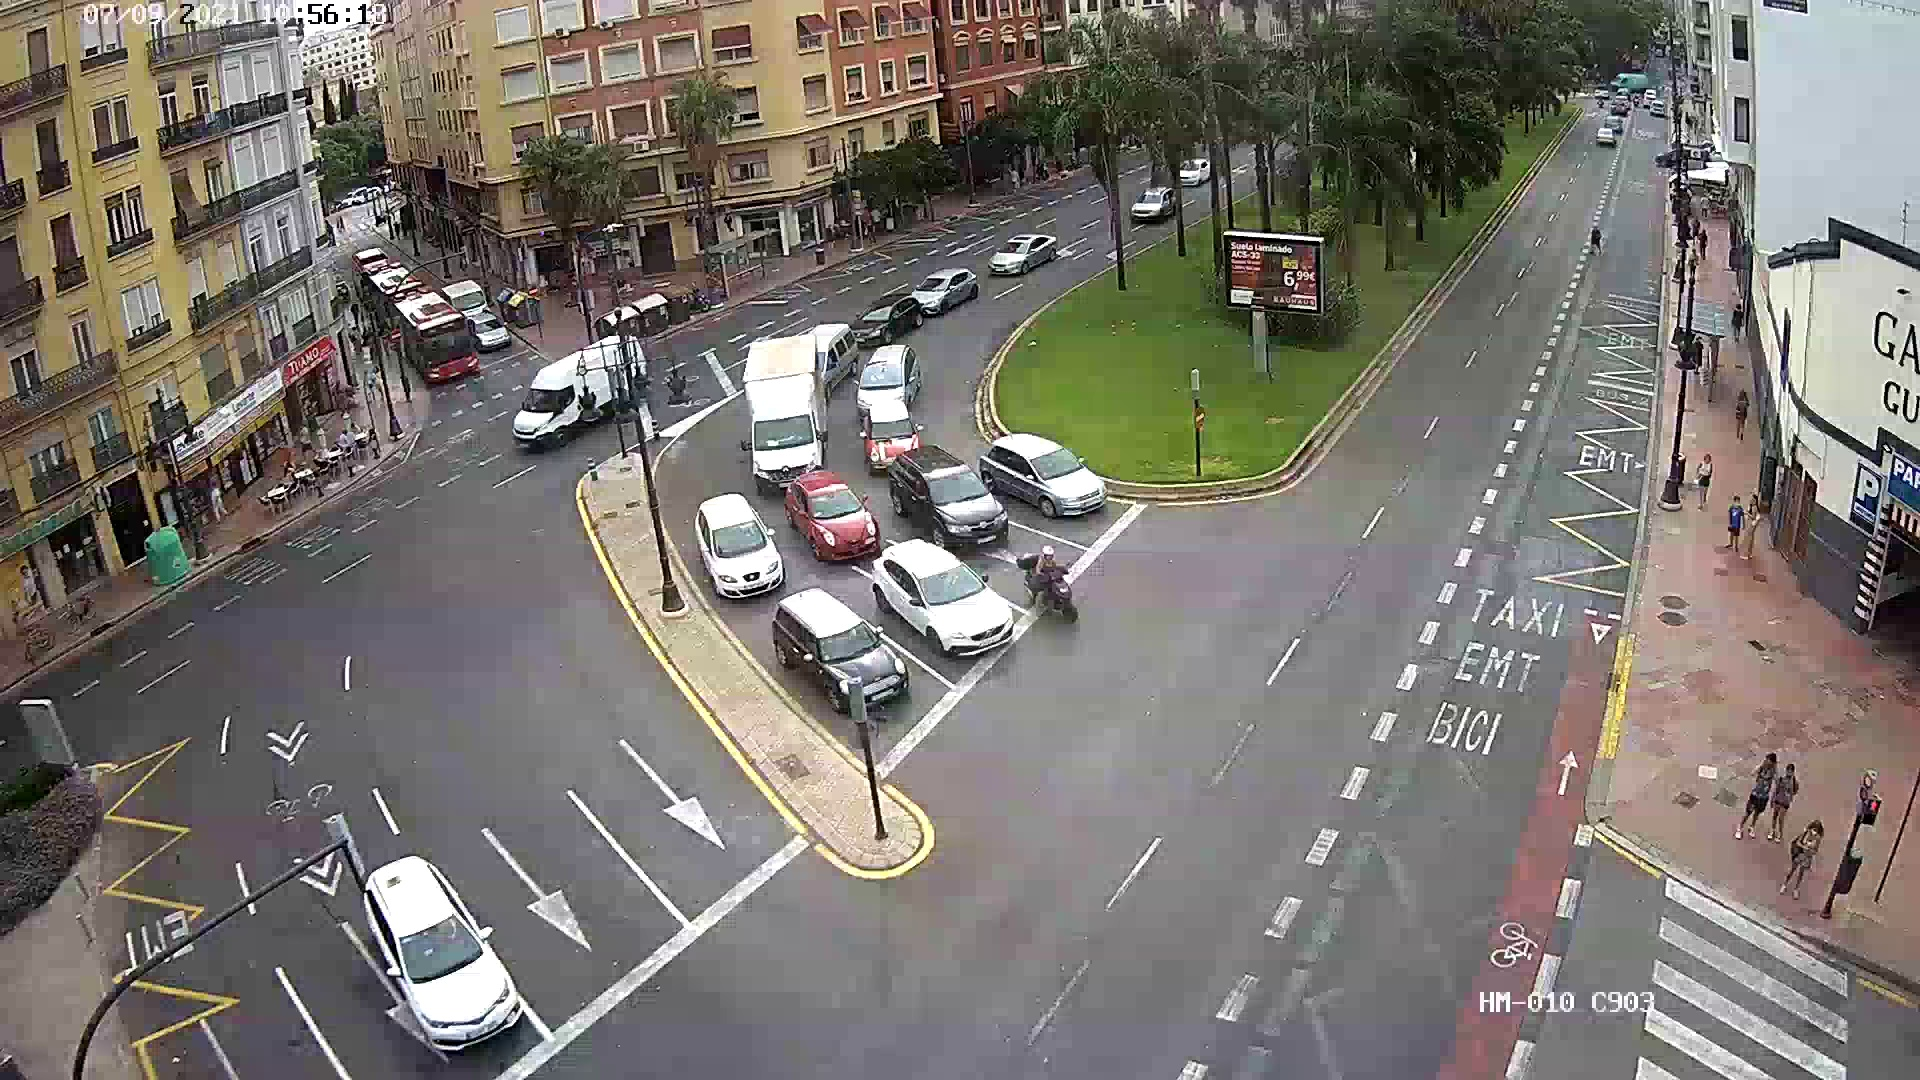

In [12]:
display.Image("./mmdetection/demo/img_0.jpg")

## Step 1: Visualization of detection results from model pretrained on MSCOCO

There exist 80 classes. We are targeting on vehicle only. 

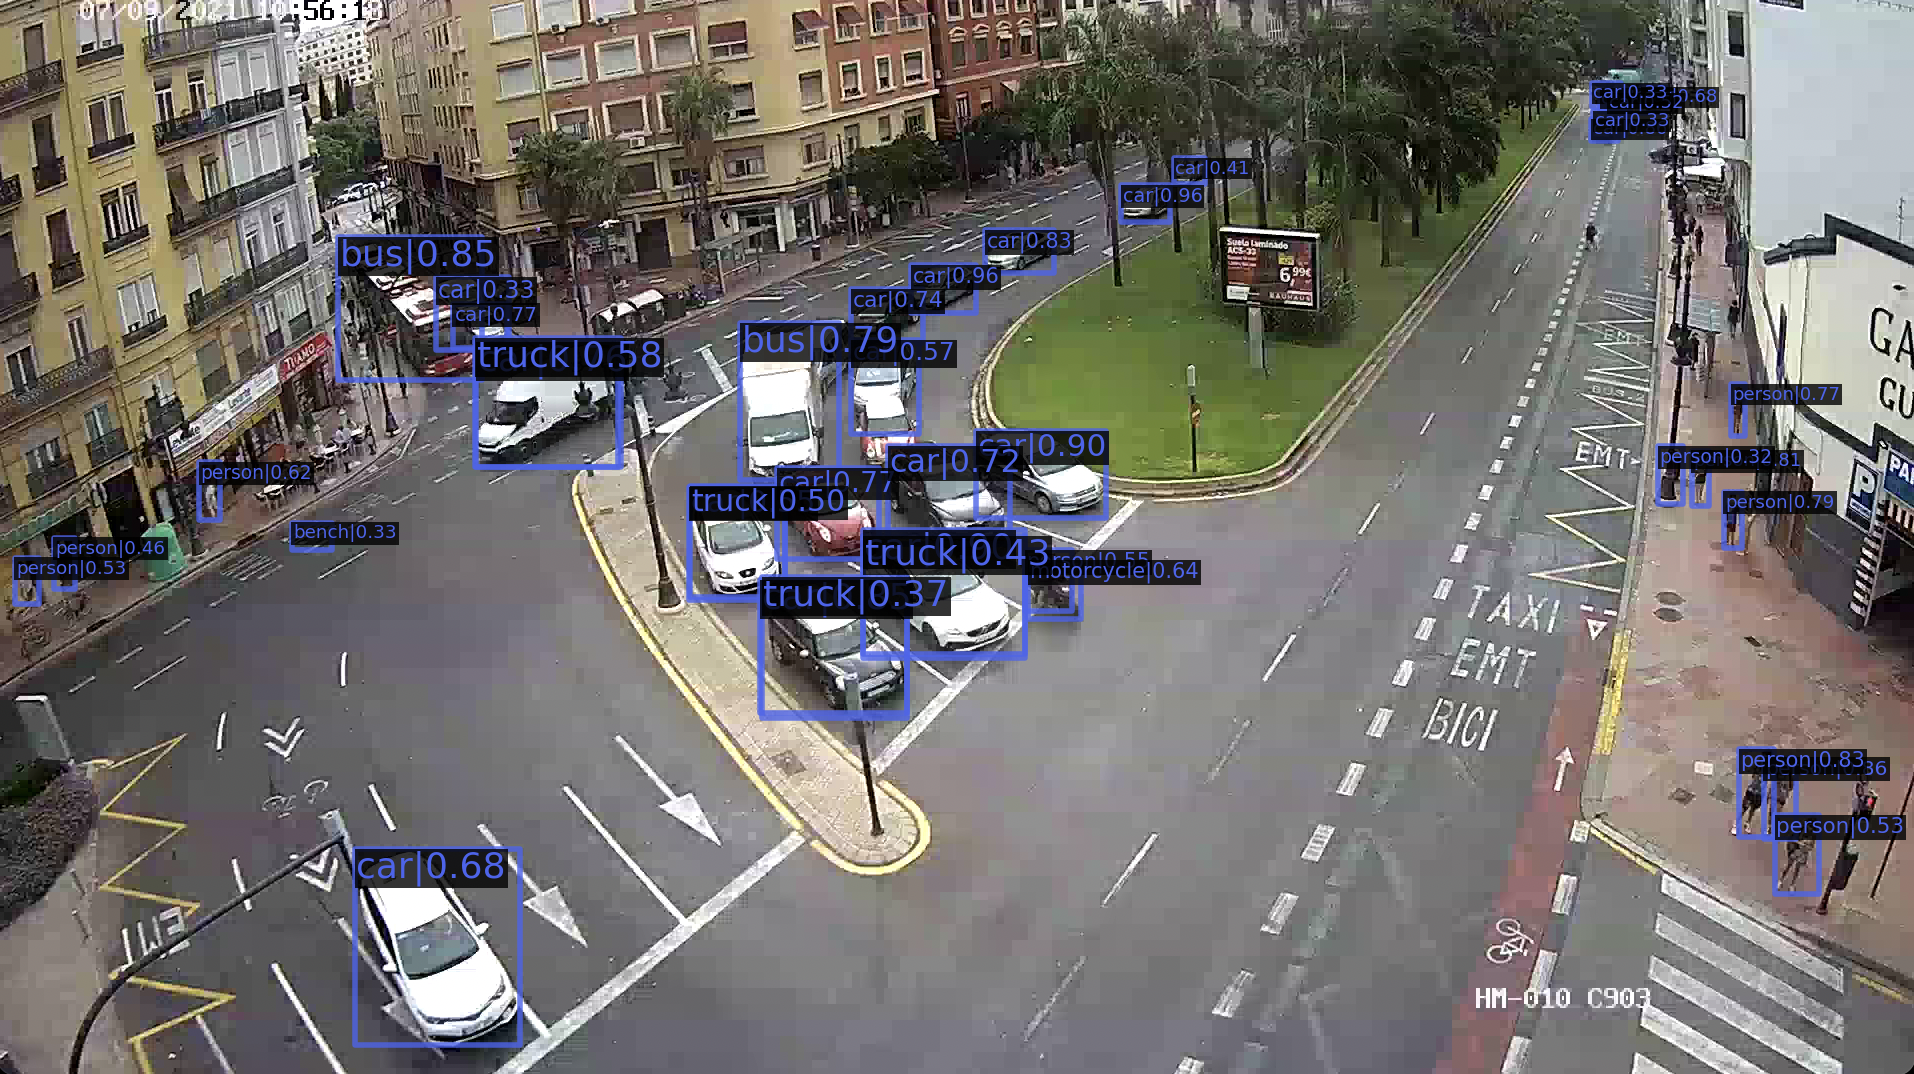

In [16]:
display.Image("/Users/Qianyu/Downloads/Unleash/camera_detect.png")

## Step 2: Keep the required results

Target classes:

bicycle, car, motorcycle, bus, truck

In [25]:
target_class_ids = [1,2,3,5,7]

In [34]:
score_thres = 0.25

In [40]:
def select_result(target_class_ids, score_thres):
    for fid in range(frame_num):
        result = pkl.load(open('./mmdetection/results/frame_%d.pkl'%fid, 'rb'))
        new_result = dict()
        for cid in target_class_ids:
            new_result[cid] = [bb for bb in result[cid] if bb[-1] > score_thres]

        pkl.dump(new_result, open('./mmdetection/results/target_%d.pkl'%fid, 'wb'))

## Step 3: Multiple Object Tracking with Deepsort

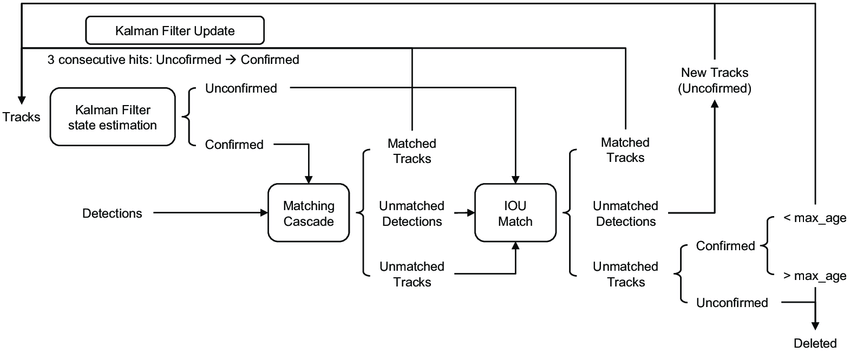

In [36]:
display.Image("/Users/Qianyu/Downloads/Unleash/pics/DeepSort.png")

https://github.com/ZQPei/deep_sort_pytorch

### How to improve
- accurate detection model finetuned on vehicle dataset
- 3d object detection model